# A - Wind in the boundary layer


This notebook is meant to help you start with the project. It shows how to read the data files, how to select specific data fields, how to resample the time series and how to plot them.**

In [1]:
# import libraries
%matplotlib widget
import numpy as np
import xarray as xr
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as pl

## 1- Read lidar data

In [2]:
# Open lidar files with xarray
files = "./A_Wind_in_boundary_layer/lidar_monthly/*.nc"
lidar_xr = xr.open_mfdataset(files)

# visualize
lidar_xr

<xarray.Dataset>
Dimensions:              (time: 28366, range: 12, nv: 2)
Coordinates:
  * range                (range) float32 40.0 60.0 80.0 ... 220.0 250.0 290.0
  * time                 (time) datetime64[ns] 2017-01-01 ... 2017-10-10T10:0...
Dimensions without coordinates: nv
Data variables: (12/28)
    CNR                  (time, range) float32 dask.array<chunksize=(1, 12), meta=np.ndarray>
    CNR_min              (time, range) float32 dask.array<chunksize=(1, 12), meta=np.ndarray>
    CNR_threshold        (time) float32 -22.0 -22.0 -22.0 ... -23.0 -23.0 -23.0
    DSB                  (time, range) float32 dask.array<chunksize=(1, 12), meta=np.ndarray>
    alt                  (time) float32 153.0 153.0 153.0 ... 153.0 153.0 153.0
    data_availability    (time, range) float32 dask.array<chunksize=(1, 12), meta=np.ndarray>
    ...                   ...
    wiper_count          (time) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    wiper_duration       (time) float32 100.0 100.0 100.0 ... 5e+03 5e+03 5e+03
    ws                   (time, range) float32 dask.array<chunksize=(1, 12), meta=np.ndarray>
    ws_disp              (time, range) float32 dask.array<chunksize=(1, 12), meta=np.ndarray>
    ws_max               (time, range) float32 dask.array<chunksize=(1, 12), meta=np.ndarray>
    ws_min               (time, range) float32 dask.array<chunksize=(1, 12), meta=np.ndarray>
Attributes: (12/64)
    system:                          LEOSPHERE WLS7v2
    site_location:                   palaiseau, france
    instrument_id:                   WLS7-111
    instrument_firmware_version:     1.1.15
    principal_investigator:          Eric Dupont
    WMO:                             07151
    ...                              ...
    instrument:                      GCMD:Earth Remote Sensing Instruments, G...
    instrument_vocabulary:           GCMD:GCMD Instruments/Sensors
    cdm_data_type:                   
    metadata_link:                   
    references:                      
    nco_openmp_thread_number:        1

In [3]:
# Access variable (here eastward_wind u)
lidar_xr.wd    # or lidar_xr['u']. To select several variables, use double crochets: lidar_xr[['wd','ws']]

<xarray.DataArray 'wd' (time: 28366, range: 12)>
dask.array<concatenate, shape=(28366, 12), dtype=float32, chunksize=(1, 12), chunktype=numpy.ndarray>
Coordinates:
  * range    (range) float32 40.0 60.0 80.0 100.0 ... 200.0 220.0 250.0 290.0
  * time     (time) datetime64[ns] 2017-01-01 ... 2017-10-10T10:00:00
Attributes:
    standard_name:          wind_from_direction
    units:                  degree
    coverage_content_type:  physicalMeasurement

In [26]:
# Put the variable into a pandas Dataframe
## Optional (they have similar utilities).
lidar_u = lidar_xr['u'].to_pandas()
lidar_v = lidar_xr['v'].to_pandas()
lidar_spd = np.sqrt(lidar_u ** 2 + lidar_v ** 2)
lidar_spd

range,40.0,60.0,80.0,100.0,120.0,140.0,160.0,180.0,200.0,220.0,250.0,290.0
time,,,,,,,,,,,,
2017-01-01 00:00:00,3.34,3.78,4.11,4.29,4.29,4.38,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:10:00,3.62,4.09,4.25,4.30,4.35,4.13,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:20:00,3.55,4.04,4.33,4.56,4.66,4.41,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:30:00,3.73,4.12,4.22,4.27,4.40,4.76,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 00:40:00,3.40,3.82,4.05,4.20,4.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-10 09:20:00,2.76,2.98,3.13,3.18,3.23,3.18,3.11,3.19,3.41,3.54,3.62,3.99
2017-10-10 09:30:00,3.03,3.37,3.64,3.88,4.00,4.07,4.12,4.18,4.18,4.22,4.35,4.30
2017-10-10 09:40:00,3.60,3.79,3.92,3.99,4.02,4.07,4.15,4.35,4.49,4.61,4.79,4.76


In [37]:
# How to concatenate two variables in the same DataFrame

#pd.DataFrame([lidar_xr['ws'].loc[:,40].to_pandas(),lidar_xr['wd'].loc[:,40].to_pandas()])

A= lidar_xr['ws'].loc[:,40].to_pandas()
B= lidar_xr['wd'].loc[:,40].to_pandas()
pd.concat([A,B], axis=1, keys=['ws','wd'])

,ws,wd
time,,
2017-01-01 00:00:00,3.34,212.699997
2017-01-01 00:10:00,3.62,208.399994
2017-01-01 00:20:00,3.55,197.699997
2017-01-01 00:30:00,3.73,202.100006
2017-01-01 00:40:00,3.40,181.399994
...,...,...
2017-10-10 09:20:00,2.76,232.100006
2017-10-10 09:30:00,3.03,223.699997
2017-10-10 09:40:00,3.60,239.800003


In [5]:
# pandas to numpy 
u_array = lidar_u.values
u_array

array([[1.8044027, 1.8036602, 1.8531067, ...,       nan,       nan,
              nan],
       [1.7217597, 1.7993512, 1.8896995, ...,       nan,       nan,
              nan],
       [1.0793173, 1.2551328, 1.4738435, ...,       nan,       nan,
              nan],
       ...,
       [3.1113894, 3.2452521, 3.3170772, ..., 4.1328025, 4.351754 ,
        4.422671 ],
       [3.3709826, 3.5976362, 3.7351182, ..., 4.668571 , 5.010941 ,
        5.30156  ],
       [4.3125596, 4.3234124, 4.432315 , ..., 4.789211 , 4.957825 ,
        5.2400393]], dtype=float32)

## 2- Select data

#### Select time steps

In [6]:
# Select a specific time
lidar_u_20170210_12 = lidar_u.loc['2017-02-10 12:00:00']
# lidar_u_20170210_12 = lidar_u.sel(time='2017-02-10 12:00:00') # another possibility

lidar_u_20170210_12

range
40.0    -2.490802
60.0    -3.303002
80.0    -3.572695
100.0   -3.701132
120.0   -3.825761
140.0   -3.910984
160.0   -3.999735
180.0   -4.153575
200.0   -4.324750
220.0   -4.423466
250.0   -4.516186
290.0   -4.521792
Name: 2017-02-10 12:00:00, dtype: float32

In [7]:
# Select a time range
lidar_u_20170210 = lidar_u.loc['2017-02-10 00:00:00':'2017-02-11 00:00:00']

lidar_u_20170210

range,40.0,60.0,80.0,100.0,120.0,140.0,160.0,180.0,200.0,220.0,250.0,290.0
time,,,,,,,,,,,,
2017-02-10 00:00:00,-2.437861,-3.304679,-3.943502,-4.508665,-5.047346,-5.415338,-5.778112,-6.162775,-6.467216,-6.675795,-6.880503,-6.550485
2017-02-10 00:10:00,-2.680055,-3.624152,-4.158683,-4.591591,-4.851430,-5.059141,-5.216420,-5.333554,-5.499706,-5.585399,-5.801258,-5.978806
2017-02-10 00:20:00,-2.653463,-3.276698,-3.777072,-4.233612,-4.647179,-4.957925,-5.204099,-5.464509,-5.749967,-5.963322,-6.151153,-6.505227
2017-02-10 00:30:00,-2.710232,-3.443024,-4.049657,-4.517397,-4.789553,-5.049183,-5.268092,-5.516181,-5.679646,-5.784914,-6.033043,-6.485720
2017-02-10 00:40:00,-2.527558,-3.202066,-3.531392,-3.818756,-4.087456,-4.363145,-4.557418,-4.767277,-4.954368,-5.135157,-5.424334,-5.738985
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-10 23:20:00,0.758878,0.893168,0.878587,0.867813,0.927691,1.012747,1.078355,1.108064,1.144034,1.197960,1.354010,1.439016
2017-02-10 23:30:00,0.679933,0.761233,0.815455,0.887342,0.923899,0.975597,0.978998,1.031234,1.120454,1.213030,1.317092,1.540696
2017-02-10 23:40:00,0.703447,0.789080,0.840457,0.934868,0.989539,0.962256,0.948948,1.078355,1.166154,1.280328,1.429468,1.670977


#### Select ranges

In [8]:
# Select a specific range (here 100m)
lidar_u_r100 = lidar_u.loc[:,100]

lidar_u_r100

time
2017-01-01 00:00:00    1.813032
2017-01-01 00:10:00    1.878248
2017-01-01 00:20:00    1.604398
2017-01-01 00:30:00    1.474423
2017-01-01 00:40:00    0.873229
                         ...   
2017-10-10 09:20:00    2.275903
2017-10-10 09:30:00    2.805113
2017-10-10 09:40:00    3.315628
2017-10-10 09:50:00    3.791214
2017-10-10 10:00:00    4.506453
Name: 100.0, Length: 28366, dtype: float32

In [9]:
# Select a range of ranges
lidar_u_r100_r150 = lidar_u.loc[:,100:150]

lidar_u_r100_r150

range,100.0,120.0,140.0
time,,,
2017-01-01 00:00:00,1.813032,1.676237,1.612386
2017-01-01 00:10:00,1.878248,1.817722,1.725791
2017-01-01 00:20:00,1.604398,1.654798,1.659149
2017-01-01 00:30:00,1.474423,1.483219,1.175715
2017-01-01 00:40:00,0.873229,1.186243,NaN
...,...,...,...
2017-10-10 09:20:00,2.275903,2.381406,2.436021
2017-10-10 09:30:00,2.805113,2.944388,3.076324
2017-10-10 09:40:00,3.315628,3.340558,3.440216


#### Extract data

In [10]:
# Extract data, e.g the month of february for range between 100 and 200m
u_select = lidar_u.loc["2017-02",100:200]

u_select

range,100.0,120.0,140.0,160.0,180.0,200.0
time,,,,,,
2017-02-01 00:00:00,-0.965345,-0.903365,-0.849407,-0.786361,-1.374296,NaN
2017-02-01 00:10:00,-1.113139,-1.049449,-0.857512,-0.688173,-0.386024,NaN
2017-02-01 00:20:00,-1.018165,-0.899522,-0.803001,-0.774883,-0.777595,NaN
2017-02-01 00:30:00,-1.118822,-1.058390,-0.971399,-0.767693,-0.643195,NaN
2017-02-01 00:40:00,-0.976086,-0.817264,-0.646760,-0.621420,-0.575652,NaN
...,...,...,...,...,...,...
2017-02-28 23:10:00,8.063028,8.917195,9.774686,10.515254,11.134976,11.787764
2017-02-28 23:20:00,7.963629,8.728639,9.560073,10.406588,11.207384,11.865117
2017-02-28 23:30:00,7.081939,7.835363,8.545089,9.186528,9.816598,10.553355


#### Selecting by index

In [11]:
# it is also possible to select by indexes instead of labels
u_select_bis = lidar_u.iloc[50:60, 3:6]
# u_select_bis = lidar_u.isel(time=range(50,60), range=range(3,6)) # another possibility

u_select_bis

range,100.0,120.0,140.0
time,,,
2017-01-01 08:20:00,0.780478,0.793475,0.951228
2017-01-01 08:30:00,1.064539,1.118820,1.194388
2017-01-01 08:40:00,0.752617,0.767989,0.899509
2017-01-01 08:50:00,1.251267,1.195100,1.348091
2017-01-01 09:00:00,2.075319,2.231791,2.521260
2017-01-01 09:10:00,1.684849,1.869215,2.204240
2017-01-01 09:20:00,1.243317,1.531394,2.094858
2017-01-01 09:30:00,1.772048,2.119695,2.439098
2017-01-01 09:40:00,1.569300,1.789730,2.025943


## 3- Resample data

In [27]:
daily_lidar_spd = lidar_spd.resample("D").mean()  # resample to daily
daily_lidar_spd

range,40.0,60.0,80.0,100.0,120.0,140.0,160.0,180.0,200.0,220.0,250.0,290.0
time,,,,,,,,,,,,
2017-01-01,4.087708,4.646806,5.036736,5.302569,5.528403,5.878029,6.106735,8.133333,9.138572,8.540000,NaN,NaN
2017-01-02,2.505139,2.946597,3.228472,3.495208,3.754792,4.144420,4.616769,5.074250,5.661284,5.994324,6.862820,7.198261
2017-01-03,2.579931,2.799514,2.961458,3.078125,3.268214,3.299080,3.616852,5.220370,7.151765,9.326667,13.351666,13.142500
2017-01-04,4.833055,5.589861,6.239236,6.844097,7.467430,8.080000,8.653126,9.225555,9.733264,10.256000,10.917481,11.698720
2017-01-05,4.163472,4.943611,5.501111,5.979306,6.429028,6.831458,7.177778,7.476597,7.739653,7.972986,8.213333,8.321528
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-06,4.077500,5.065000,5.743472,6.170972,6.538055,6.817847,7.048472,7.251597,7.414722,7.565069,7.751428,7.994127
2017-10-07,5.189722,5.945764,6.590139,7.066111,7.439584,7.762708,8.057917,8.342361,8.610695,8.860000,9.233402,9.694926
2017-10-08,3.573542,4.082847,4.484167,4.783056,5.047292,5.265278,5.443334,5.602222,5.704236,5.886187,5.995072,6.146692


In [28]:
# Compute monthly mean for the lidar data
monthly_lidar_spd = lidar_spd.resample("MS").mean()
monthly_lidar_spd

range,40.0,60.0,80.0,100.0,120.0,140.0,160.0,180.0,200.0,220.0,250.0,290.0
time,,,,,,,,,,,,
2017-01-01,4.144624,4.824361,5.332574,5.758278,6.223151,6.703261,7.149215,7.594762,7.985715,8.350795,8.879037,9.182806
2017-02-01,5.005986,5.760824,6.336122,6.806574,7.252305,7.683996,8.068683,8.440388,8.747182,9.033875,9.372687,9.697083
2017-03-01,4.811530,5.489554,6.002563,6.414983,6.810621,7.172682,7.499341,7.820146,8.091516,8.356228,8.754659,9.248787
2017-04-01,3.710012,4.332268,4.676890,4.931939,5.156329,5.331305,5.466464,5.589951,5.689281,5.786876,5.983284,6.485636
2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-01,4.185507,4.799871,5.241551,5.562091,5.846090,6.098727,6.322656,6.532457,6.720763,6.898759,7.233596,7.887017
2017-08-01,3.534966,4.085168,4.503398,4.818613,5.100392,5.341594,5.540074,5.717715,5.881774,6.011964,6.254266,6.625271
2017-09-01,4.037910,4.688354,5.210618,5.598303,5.939609,6.231044,6.470667,6.721639,6.951096,7.237569,7.719070,8.606634


## 5- Plot data

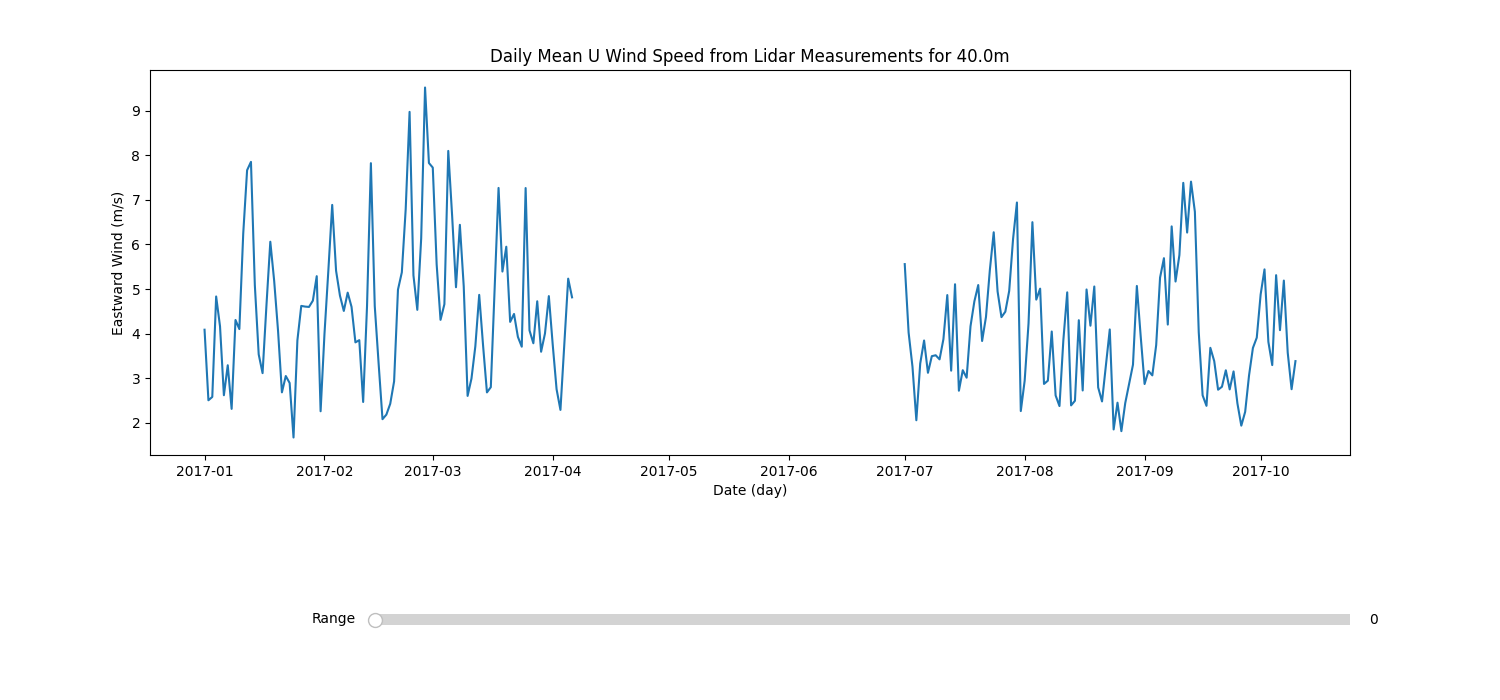

In [37]:
# # Plot lidar timeseries
# pl.figure(1,figsize=(15,5))
# pl.plot(lidar_u.resample("D").mean())
# pl.ylabel('eastward_wind (m.s^-1)')
# pl.xlabel('date (day)')
# pl.legend(lidar_u.columns,title="range")
# pl.title('Daily mean u wind components from lidar measurements')
# pl.show()


from matplotlib.widgets import Slider

fig, ax = pl.subplots(figsize=(15, 7))
pl.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.35)

default_column = daily_lidar_spd.columns[0]
line, = ax.plot(daily_lidar_spd[default_column])

ax.set_ylabel('Wind (m/s)')
ax.set_xlabel('Date (day)')
ax.set_title('Daily Mean Wind Speed from Lidar Measurements for ' + str(default_column) + 'm')

axcolor = 'lightgoldenrodyellow'
axrange = pl.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

slider = Slider(axrange, 'Range', 0, len(daily_lidar_spd.columns) - 1, valinit=0, valstep=1, valfmt='%0.0f')

def update(val):
    column_idx = int(slider.val)
    selected_column = daily_lidar_spd.columns[column_idx]
    line.set_ydata(daily_lidar_spd[selected_column])
    ax.relim()  # Recalculate limits
    ax.autoscale_view()  # Rescale the y-axis
    ax.set_title('Daily Mean Wind Speed from Lidar Measurements for ' + str(selected_column) + 'm')
    fig.canvas.draw_idle()

slider.on_changed(update)

pl.show()

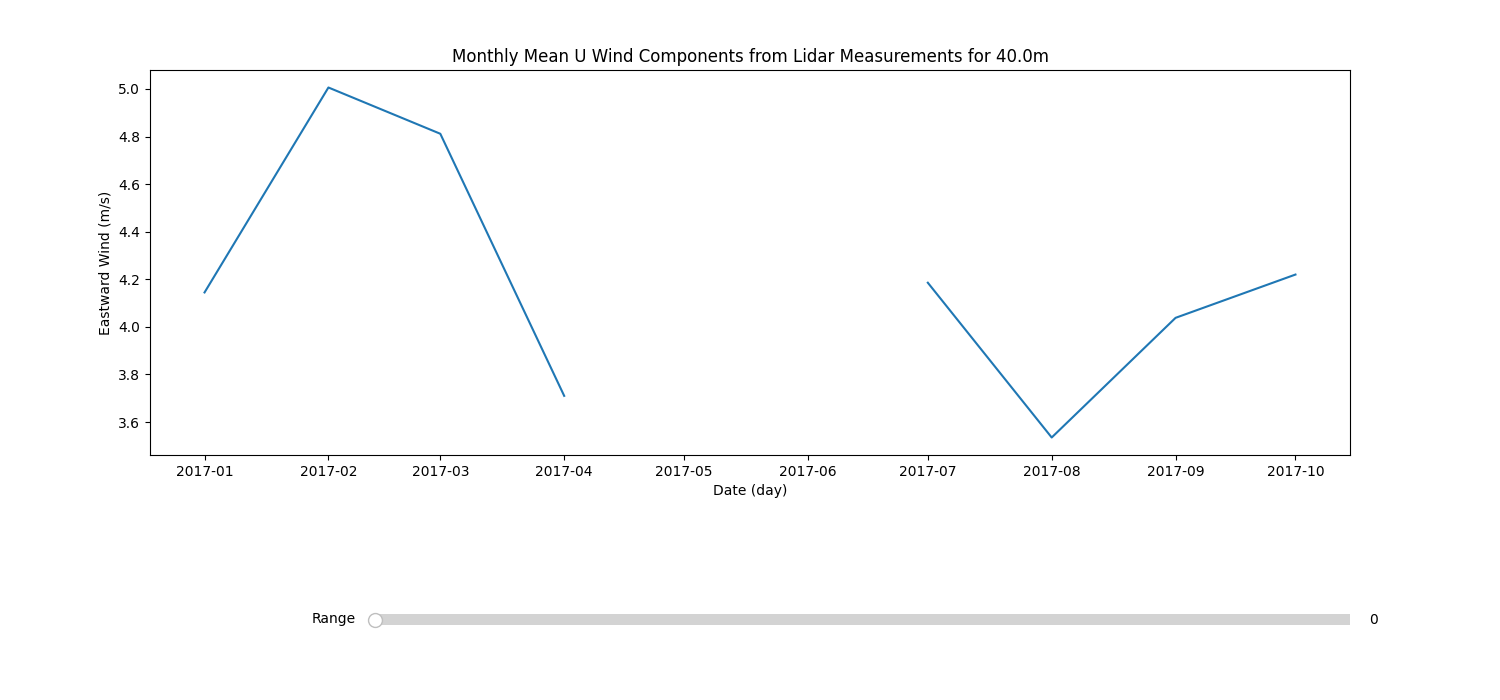

In [31]:
fig, ax = pl.subplots(figsize=(15, 7))
pl.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.35)

default_column = monthly_lidar_spd.columns[0]
line, = ax.plot(monthly_lidar_spd[default_column])

ax.set_ylabel('Wind (m/s)')
ax.set_xlabel('Date (day)')
ax.set_title('Monthly Mean Wind Components from Lidar Measurements for ' + str(default_column) + 'm')

axcolor = 'lightgoldenrodyellow'
axrange = pl.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)

slider = Slider(axrange, 'Range', 0, len(monthly_lidar_spd.columns) - 1, valinit=0, valstep=1, valfmt='%0.0f')

def update(val):
    column_idx = int(slider.val)
    selected_column = monthly_lidar_spd.columns[column_idx]
    line.set_ydata(monthly_lidar_spd[selected_column])
    ax.relim()  # Recalculate limits
    ax.autoscale_view()  # Rescale the y-axis
    ax.set_title('Monthly Mean U Wind Components from Lidar Measurements for ' + str(selected_column) + 'm')
    fig.canvas.draw_idle()

slider.on_changed(update)

pl.show()


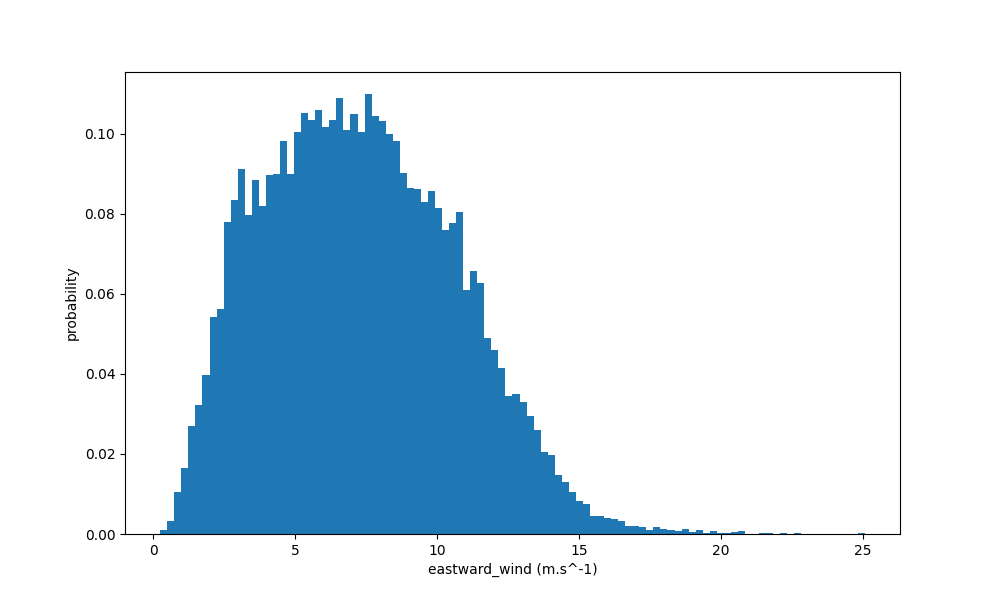

In [33]:
# Plot histogram for height=200m
pl.close()
pl.figure(2,figsize=(10,6))
pl.hist(lidar_spd.loc[:,200],bins=100,density=True)
pl.xlabel('eastward_wind (m.s^-1)')
pl.ylabel('probability')
pl.show()



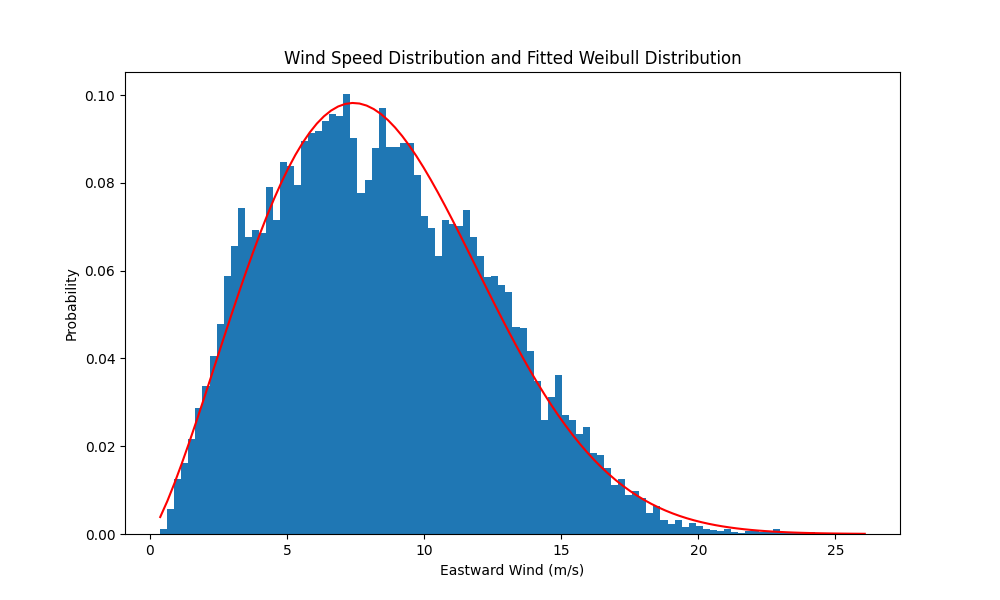

Weibull Shape Parameter: 2.277021044872493
Weibull Scale Parameter: 9.566079648295174


In [35]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

def plot_weibull_with_params(data):
    # Fit the data to a Weibull distribution
    shape, loc, scale = stats.weibull_min.fit(data, floc=0)

    # Generate wind speeds for the PDF plot
    wind_speeds = np.linspace(min(data), max(data), 100)

    # Calculate the Weibull PDF using the fitted parameters
    pdf_fitted = stats.weibull_min.pdf(wind_speeds, shape, loc, scale)

    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=100, density=True)
    plt.plot(wind_speeds, pdf_fitted, 'r-')
    plt.xlabel('Eastward Wind (m/s)')
    plt.ylabel('Probability')
    plt.title('Wind Speed Distribution and Fitted Weibull Distribution')
    plt.show()

    return shape, scale


data = lidar_spd.loc[:, 290].dropna()  # Drop NaN values
shape_param, scale_param = plot_weibull_with_params(data)

print("Weibull Shape Parameter:", shape_param)
print("Weibull Scale Parameter:", scale_param)
